Решение задачи 2 по физико-химической гидрогеодинамике с помощью численного расчета преобразования Лапласа-Карсона

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats

In [3]:
bound = 0.08# g/l
x = 1.2 #meters
num_data_points = 16 # number of data points including initial conditions
time = [0,1,2,3,4,5,6,8,9,10,11,12,13,14, 15]
list1 = [11, 10.146,8.866,7.370,5.871,4.511,3.362,1.741,1.222,0.850,0.590,0.413,0.294,0.216, 0.08]
#data = np.array(list)
# Create DataFrame 
df = pd.DataFrame({'TimeDays': time, 'C, g/l':list1}) 
for i in range(17,101):
#    print(i)
    df.loc[i] = [i,0.08]
df['c^'] = (df['C, g/l']-df['C, g/l'].max())/(bound-df['C, g/l'].max())
# Print the output. 
df 


,TimeDays,"C, g/l",c^
0,0.0,11.000,-0.000000
1,1.0,10.146,0.078205
2,2.0,8.866,0.195421
3,3.0,7.370,0.332418
4,4.0,5.871,0.469689
...,...,...,...
96,96.0,0.080,1.000000
97,97.0,0.080,1.000000
98,98.0,0.080,1.000000
99,99.0,0.080,1.000000


(0, 20)

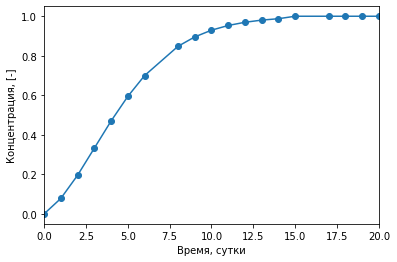

In [16]:
fig, ax= plt.subplots()
ax.plot(df['TimeDays'],df['c^'], 'o-')
ax.set_xlabel('Время, сутки')
ax.set_ylabel('Концентрация, [-]')
ax.set_xlim(0,20)

In [5]:
# p = [0.357,0.556,1.000,1.429]
# for x in p:
#     print(x)
p = [0.36,0.56,1.000,1.4]    

In [6]:
integrated = []
for count in p:
#    print('p = ' +str(count))
    df['laplace'] = df['c^']*np.exp(-count*df['TimeDays'])
    #df
    #s = df.apply(lambda g: integrate.trapz(df['laplace'], x=df['TimeDays']))
    s = integrate.simps(df['laplace'], x=df['TimeDays'])
    s = s*count
    integrated.append(s)
    print('p = ' +str(count) +' int = '+ str(s))
integrated

p = 0.36 int = 0.28435075569219315
p = 0.56 int = 0.18200092139937146
p = 1.0 int = 0.09176498899940368
p = 1.4 int = 0.05930598399839725


[0.28435075569219315,
 0.18200092139937146,
 0.09176498899940368,
 0.05930598399839725]

In [7]:
df_final = pd.DataFrame({'p, days^-1':p, 'U^':integrated}) 
df_final

,"p, days^-1",U^
0,0.36,0.284351
1,0.56,0.182001
2,1.00,0.091765
3,1.40,0.059306


In [8]:
df_final['a,m-1'] = -1/1.2*np.log(df_final['U^'])
df_final['p/a'] =df_final['p, days^-1']/df_final['a,m-1'] 
df_final

,"p, days^-1",U^,"a,m-1",p/a
0,0.36,0.284351,1.047956,0.343526
1,0.56,0.182001,1.419786,0.394426
2,1.00,0.091765,1.990437,0.502402
3,1.40,0.059306,2.354204,0.594681


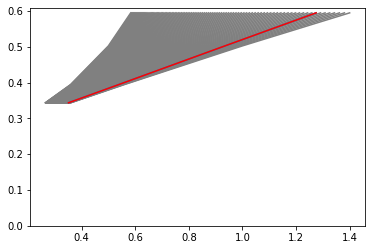

In [9]:
r2 = []
listofslopes = []
listofintercepts = []
fig, ax1= plt.subplots()
A3 = np.linspace(0,1,101)
df_results = pd.DataFrame({'A3': A3 , 'R2':''}) 
for count1 in A3:
    df_final['result'] = df_final['p, days^-1']/(1+count1*df_final['p, days^-1'])
    ax1.plot(df_final['result'],df_final['p/a'], '-', color = 'gray')
    slope, intercept, r_value, _, _ = stats.linregress(df_final['result'],df_final['p/a'])
    r2.append(r_value**2)
    listofintercepts.append(intercept)
    listofslopes.append(slope)
df_results['R2'] = r2
df_results['slope'] = listofslopes
df_results['intercept'] = listofintercepts
df_results
slope1 = df_results['slope'].loc[df_results['R2'].idxmax()]
intercept1 = df_results['intercept'].loc[df_results['R2'].idxmax()]
ax1.plot((df_final['p/a']-intercept1)/slope1,df_final['p/a'])
#intercepty = slope1*0+intercept1
ax1.set_ylim(bottom = 0)
A3_res = df_results['A3'].loc[df_results['R2'].idxmax()]
df_final['result'] = df_final['p, days^-1']/(1+A3_res*df_final['p, days^-1'])
ax1.plot(df_final['result'],df_final['p/a'], '-', color = 'red')

In [10]:
df_results.loc[df_results['R2'].idxmax()]
#count1
#df_final[['p/a','result']]

A3           0.070000
R2           0.999998
slope        0.271991
intercept    0.247990
Name: 7, dtype: float64

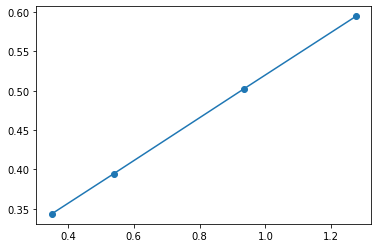

In [11]:
plt.plot(df_final['result'],df_final['p/a'],'o-')

In [12]:
pd.set_option('display.max_rows', 10)
df_results

,A3,R2,slope,intercept
0,0.00,0.999644,0.241545,0.258277
1,0.01,0.999739,0.245826,0.256790
2,0.02,0.999818,0.250131,0.255310
3,0.03,0.999882,0.254458,0.253835
4,0.04,0.999931,0.258807,0.252365
...,...,...,...,...
96,0.96,0.984231,0.756273,0.129928
97,0.97,0.984020,0.762743,0.128673
98,0.98,0.983809,0.769236,0.127419
99,0.99,0.983598,0.775752,0.126166


In [14]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = (k*(1-k)*n)/A3_res
print('n = '+ str(n))
print('k = ' +str(k))
print('alpha = '+str(alpha))

n = 0.40324274187360826
k = 0.05075949661153453
alpha = 0.2775633282985555


In [260]:
0.0868526565612364*(1-0.0868526565612364)*0.4485852957692019/A3_res

0.16171351595804262

In [205]:
df_final['p/a'] = [0.344,0.398,0.513,]

In [206]:
df_final['p/a']

0    0.344
1    0.398
2    0.513
3    0.622
Name: p/a, dtype: float64